# L5 Data Preparation(1)

After this exercise, you will learn how to 

* Perform data extraction from XML documents
* Perform data extraction from JSON documents

In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_dir_path='/content/drive/My Drive/Data/DS5/'

Mounted at /content/drive


## XML and XPath




###Recall that we've seen the following XML document in the lecture.

```xml
<addressbook>
    <contact>
        <name>Kenny</name>
        <phone type="office">65501696</phone> 
        <email>kenny_lu@nyp.edu.sg</email>
    </contact>
    <contact>
        <name>Charles</name>
        <phone type="mobile">95501551</phone> 
        <email>charles_lee@nyp.edu.sg</email>
    </contact>
</addressbook>
```

### To extract sub element using `lxml` and `xpath`.

Get information under the node /addressbook/contact


<details><summary>Click here for answer</summary> 
<br/>

```

from lxml import etree

doc = etree.parse(data_dir_path+"p5_addressbook.xml") # the XML file must be wellformed
results = doc.xpath("/addressbook/contact")

print(results)

for e in results:
    print([c.text for c in e.getchildren()])


```

<br/>
</details>





In [ ]:
#Add code

In [2]:
#add code 
from lxml import etree
 
doc = etree.parse(data_dir_path+"p5_addressbook.xml") # the XML file must be wellformed
results = doc.xpath("/addressbook/contact")
 
print(results)
 
for e in results:
    print([c.text for c in e.getchildren()])



[<Element contact at 0x7fb6a50d4230>, <Element contact at 0x7fb6a50d41e0>]
['Kenny', '65501696', 'kenny_lu@nyp.edu.sg']
['Charles', '95501551', 'charles_lee@nyp.edu.sg']



###You also can get the node value using /text()

<details><summary>Click here for answer</summary> 
<br/>

```

# alternatively
for e in results:
    name = e.xpath("name/text()")
    phone = e.xpath("phone/text()")
    email = e.xpath("email/text()")
    print("name = %s, phone = %s, email = %s" % (name[0],phone[0],email[0]))

```

<br/>
</details>





In [ ]:
#Add code

In [ ]:
for e in results:
    name = e.xpath("name/text()")
    phone = e.xpath("phone/text()")
    email = e.xpath("email/text()")
    print("name = %s, phone = %s, email = %s" % (name[0],phone[0],email[0]))

name = Kenny, phone = 65501696, email = kenny_lu@nyp.edu.sg
name = Charles, phone = 95501551, email = charles_lee@nyp.edu.sg


###Try using another xpath expression

use // Selects nodes in the document from 
the current node that match the 
selection no matter where they are

<details><summary>Click here for answer</summary> 
<br/>

```

results = doc.xpath("//contact")
for e in results:
    print([c.text for c in e.getchildren()])

```

<br/>
</details>





In [ ]:
#Add code

In [ ]:
#add code
results = doc.xpath("//contact")
for e in results:
    print([c.text for c in e.getchildren()])

['Kenny', '65501696', 'kenny_lu@nyp.edu.sg']
['Charles', '95501551', 'charles_lee@nyp.edu.sg']


###Try using another xpath expression
<br>
//contact/phone[@type='mobile']
<br>


<details><summary>Click here for answer</summary> 
<br/>

```

results = doc.xpath("//contact/phone[@type='mobile']")
for e in results:
  print(e.text)

```

<br/>
</details>





In [ ]:
#Add code

In [ ]:
#add code
results = doc.xpath("//contact/phone[@type='mobile']")
for e in results:
  print(e.text)

95501551


In [68]:
results = doc.xpath("//contact/phone[@type]")
for e in results:
  print(e.text)


for e in results:
  print([c.text for c in e.getparent().getchildren()])


65501696
95501551
['Kenny', '65501696', 'kenny_lu@nyp.edu.sg']
['Charles', '95501551', 'charles_lee@nyp.edu.sg']


In [66]:
results = doc.xpath("//contact/phone/@type")
for e in results:
  print(e)

office
mobile


## XML and Xpath Exercise



###Consider another XML data file in ```data_dir_path+"p5_menu.xml```, which looks like the following 
```xml
<breakfast_menu>
  <food>
    <name>Belgian Waffles</name>
    <price>5.95</price>
    <description>Two of our famous Belgian Waffles with plenty of real maple syrup</description>
    <calories>650</calories>
  </food>
  <food>
    <name>Strawberry Belgian Waffles</name>
    <price>7.95</price>
    <description>Light Belgian waffles covered with strawberries and whipped cream</description>
    <calories>900</calories>
  </food>
  <food>
    <name>Berry-Berry Belgian Waffles</name>
    <price>8.95</price>
    <description>Light Belgian waffles covered with an assortment of fresh berries and whipped cream</description>
    <calories>900</calories>
  </food>
  <food>
    <name>French Toast</name>
    <price>4.50</price>
    <description>Thick slices made from our homemade sourdough bread</description>
    <calories>600</calories>
  </food>
  <food>
    <name>Homestyle Breakfast</name>
    <price>6.95</price>
    <description>Two eggs, bacon or sausage, toast, and our ever-popular hash browns</description>
    <calories>950</calories>
  </food>
</breakfast_menu>
```

###Your task is to define a conversion function to convert the above into the following TSV file named `data_dir_path+"p5_menu.tsv`.

```
Belgian Waffles    5.95   Two of our famous Belgian Waffles with plenty of real maple syrup    650
...
Homestyle Breakfast   6.95  Two eggs, bacon or sausage, toast, and our ever-popular hash browns   950
```

<details><summary>Click here for answer</summary> 
<br/>

Set the xpath expression

```

    menu_xml = etree.parse(data_dir_path+"p5_menu.xml")
    results = menu_xml.xpath("/breakfast_menu/food")
    print(results)
    for e in results:
       print([c.text for c in e.getchildren()])

```

Open a Text file to store value that are extracted from XML

```

with open(data_dir_path+'p5_menu.tsv' ,'w') as menu_tsv:
       for e in results:
         l=[c.text for c in e.getchildren()]
         # print(l)
         s="\t"
         line=s.join(l)
         print(line)
         menu_tsv.write(line+"\n") 

```

<br/>
</details>







In [ ]:
#Add code

In [ ]:
from lxml import etree
# todo
def menu_xml_to_tsv():
    menu_xml = etree.parse(data_dir_path+"p5_menu.xml")
    #add code -xpath express
    results = menu_xml.xpath("/breakfast_menu/food")
    print(results)
    # for e in results:
    #   print([c.text for c in e.getchildren()])

    # with open(data_dir_path+'p5_menu.tsv' ,'w') as menu_tsv:
    #   for e in results:
    #     l=[c.text for c in e.getchildren()]
    #     # print(l)
    #     s="\t"
    #     line=s.join(l)
    #     print(line)
    #     menu_tsv.write(line+"\n") 
menu_xml_to_tsv()

[<Element food at 0x7fc71b2839b0>, <Element food at 0x7fc71b283280>, <Element food at 0x7fc71b283500>, <Element food at 0x7fc71b283dc0>, <Element food at 0x7fc71b283730>]


## HTML and CSS Selector



###CSS is a power language for decorating our HTML web pages
it turns out to be very useful in extracting information from HTML document too. 
Consider the following HTML document we've seen during the lecture. 
```html
<html> <head> <title> Address Book </title> </head>
<body>
	<ul>
		<li>
			<div class="name">Kenny</div>
			<div class="phone">65501696</div>
			<div class="email">kenny_lu@nyp.edu.sg</div>
		</li>
		<li>
			<div class="name">Charles</div>
			<div class="mobile">95501551</div>
			<div class="email">charles_lee@nyp.edu.sg</div>
		</li>
	</ul>
</body>
</html>
```





###With the following code, we are able to use the css selector to extract a particular portion of the HTML document.  
We want to extract all the mobile phone



```
div_selector = CSSSelector("div[class='mobile']")
for e in div_selector(doc):
    print(e.text)
```

Install the library



```
!pip install cssselect
```



In [ ]:
#Add code

In [ ]:
!pip install cssselect

In [ ]:
from lxml import etree
from lxml.cssselect import CSSSelector
htmlparser = etree.HTMLParser()
doc = etree.parse(data_dir_path+"p5_addressbook.html", htmlparser) 
#to extract all the mobile number
#add code


In [ ]:
from lxml import etree
from lxml.cssselect import CSSSelector
htmlparser = etree.HTMLParser()
doc = etree.parse(data_dir_path+"p5_addressbook.html", htmlparser) 
#to extract all the mobile number
#add code
div_selector = CSSSelector("div[class='mobile']")
for e in div_selector(doc):
    print(e.text)


95501551


## Using BeautifulSoup as an alternative
There are situations which the `HTMLParser` in `etree` fails to perform the parsing job due to some malformed HTML document. BeaultifulSoup come in handy, in the expense a bit of performance overhead.

###Install the library



```
!pip install beautifulsoup4
!pip install lxml
!pip install future
```



In [ ]:
#Add code

In [ ]:
!pip install beautifulsoup4
!pip install lxml
!pip install future

### Open the html file



```
from bs4 import BeautifulSoup
import csv

soup = BeautifulSoup (open(data_dir_path+"p5_addressbook.html"),"html.parser")

```



In [ ]:
#Add code

In [ ]:
from bs4 import BeautifulSoup
import csv
 
soup = BeautifulSoup (open(data_dir_path+"p5_addressbook.html"),"html.parser")
 

### Use function find_all()

The find_all() method looks through a tag’s descendants and retrieves all descendants that match your filters.



```
links = soup.find_all('div', attrs={'class':'name'})
for link in links:
  print(link)
  names = link.contents[0]
  print(names)
```



In [ ]:
#Add code

In [ ]:
links = soup.find_all('div', attrs={'class':'name'})
for link in links:
  print(link)
  names = link.contents[0]
  print(names)

<div class="name">Kenny</div>
Kenny
<div class="name">Charles</div>
Charles


## Exercise CSSSelector

Consider another HTML file in data_dir_path/p5_menu.html, which looks like the following 
```html
<html> <head>
<title>Breakfast Menu</title>
</head>

<body>
<h1>Breakfast Menu</h1>

<ol class="breakfast_menu">
  <li class="food">
    <div class="name">Belgian Waffles</div>
    <div class="price">5.95</div>
    <div class="description">Two of our famous Belgian Waffles with plenty of real maple syrup</div>
    <div class="calories">650</div>
  </li>
  <li class="food">
    <div class="name">Strawberry Belgian Waffles</div>
    <div class="price">7.95</div>
    <div class="description">Light Belgian waffles covered with strawberries and whipped cream</div>
    <div class="calories">900</div>
  </li>
  <li class="food">
    <div class="name">Berry-Berry Belgian Waffles</div>
    <div class="price">8.95</div>
    <div class="description">Light Belgian waffles covered with an assortment of fresh berries and whipped cream</div>
    <div class="calories">900</div>
  </li>
  <li class="food">
    <div class="name">French Toast</div>
    <div class="price">4.50</div>
    <div class="description">Thick slices made from our homemade sourdough bread</div>
    <div class="calories">600</div>
  </li>
  <li class="food">
    <div class="name">Homestyle Breakfast</div>
    <div class="price">6.95</div>
    <div class="description">Two eggs, bacon or sausage, toast, and our ever-popular hash browns</div>
    <div class="calories">950</div>
  </li>
</ol>

</body> </html>

```



###Task
Your task is to define a function ```menu_html_to_tsv``` similar to the last exercise to extract the menu data into a tsv file named `p5_menu2.tsv`. But we will use the CSSSelector.

```
Belgian Waffles	5.95	Two of our famous Belgian Waffles with plenty of real maple syrup	650
Strawberry Belgian Waffles	7.95	Light Belgian waffles covered with strawberries and whipped cream	900
Berry-Berry Belgian Waffles	8.95	Light Belgian waffles covered with an assortment of fresh berries and whipped cream	900
French Toast	4.50	Thick slices made from our homemade sourdough bread	600
Homestyle Breakfast	6.95	Two eggs, bacon or sausage, toast, and our ever-popular hash browns	950
```



### Extract data using CSSSelector

<details><summary>Click here for answer</summary> 
<br/>

```

from lxml import etree
from lxml.cssselect import CSSSelector
def menu_html_to_tsv():
    htmlparser = etree.HTMLParser()
    menu_html = etree.parse(data_dir_path+"p5_menu.html", htmlparser) 
    food_selector = CSSSelector("li[class='food']")
    name_selector = CSSSelector("div[class='name']")
    price_selector = CSSSelector("div[class='price']")
    desc_selector = CSSSelector("div[class='description']")
    cal_selector = CSSSelector("div[class='calories']")
    with open(data_dir_path+'/p5_menu2.tsv' ,'w') as menu_tsv:
        foods = food_selector(menu_html)
        for e in foods:
            name = name_selector(e)[0].text
            price = price_selector(e)[0].text
            desc = desc_selector(e)[0].text
            cal  = cal_selector(e)[0].text
            menu_tsv.write("\t".join([name,price,desc,cal]) + "\n")
menu_html_to_tsv()

```


<br/>
</details>






In [ ]:
#Add code

In [ ]:
from lxml import etree
from lxml.cssselect import CSSSelector
def menu_html_to_tsv():
    htmlparser = etree.HTMLParser()
    menu_html = etree.parse(data_dir_path+"p5_menu.html", htmlparser) 
    food_selector = CSSSelector("li[class='food']")
    name_selector = CSSSelector("div[class='name']")
    price_selector = CSSSelector("div[class='price']")
    desc_selector = CSSSelector("div[class='description']")
    cal_selector = CSSSelector("div[class='calories']")
    with open(data_dir_path+'/p5_menu2.tsv' ,'w') as menu_tsv:
        foods = food_selector(menu_html)
        for e in foods:
            name = name_selector(e)[0].text
            price = price_selector(e)[0].text
            desc = desc_selector(e)[0].text
            cal  = cal_selector(e)[0].text
            menu_tsv.write("\t".join([name,price,desc,cal]) + "\n")
menu_html_to_tsv()

## Handling JSON data

Handling JSON data is relatively easier in Python. Consider the following JSON address book document we've seen in the lecture. 

```json
[  { "name" : "kenny",
     "phone_type" : "office",
     "phone_num" : "65501696",
     "email" : "kenny_lu@nyp.edu.sg"
   }, 
   { "name" : "charles",
     "phone_type" : "mobile",
     "phone_num" : "95501551",
     "email" : "charles_lee@nyp.edu.sg"
   }
]
```

We use the builtin `json` library in Python, which allows us to converts JSON data (as string) to Python data structure such as dictionary and list.

Read a json format as string, store them in list of dictionaries


<details><summary>Click here for answer</summary> 
<br/>

```

import json

f = open(data_dir_path+"p5_addressbook.json",'r')
l = json.loads(f.read())
f.close()
print(l) # l is a list of dictionaries


```

<br/>
</details>



Open a text file to store the json data format



<details><summary>Click here for answer</summary> 
<br/>

```

g = open(data_dir_path+"output.json", "w")
g.write(json.dumps(l))
g.close()

```

<br/>
</details>






In [ ]:
#Add code

In [ ]:
#Add code

In [ ]:
import json

f = open(data_dir_path+"p5_addressbook.json",'r')
l = json.loads(f.read())
f.close()
print(l) # l is a list of dictionaries

g = open(data_dir_path+"output.json", "w")
g.write(json.dumps(l))
g.close()


[{'name': 'kenny', 'phone_type': 'office', 'phone_num': '65501696', 'email': 'kenny_lu@nyp.edu.sg'}, {'name': 'charles', 'phone_type': 'mobile', 'phone_num': '95501551', 'email': 'charles_lee@nyp.edu.sg'}]


## Exercise Json

Convert data in `data_dir_path/p5_menu.xml` into a json file named `data_dir_path/p5_menu.json`, which should look like the following

```json
[{"price": "5.95", 
  "calories": "650", 
  "name": 
  "Belgian Waffles", 
  "description": "Two of our famous Belgian Waffles with plenty of real maple syrup"
 }, 
 {"price": "7.95", 
  "calories": "900", 
  "name": "Strawberry Belgian Waffles", 
  "description": "Light Belgian waffles covered with strawberries and whipped cream"
 }, 
 {"price": "8.95", 
  "calories": "900", 
  "name": "Berry-Berry Belgian Waffles", 
  "description": "Light Belgian waffles covered with an assortment of fresh berries and whipped cream"
 }, 
 {"price": "4.50", 
  "calories": "600", 
  "name": "French Toast", 
  "description": "Thick slices made from our homemade sourdough bread"
 }, 
 {"price": "6.95", 
  "calories": "950", 
  "name": "Homestyle Breakfast", 
  "description": "Two eggs, bacon or sausage, toast, and our ever-popular hash browns"
 }]
```

Extract XML data into list of dictionaries



Store the list of dictionary into the Json text file

<details><summary>Click here for answer</summary> 
<br/>


```

def menu_xml_to_json():
    menu = []
    menu_xml = etree.parse(data_dir_path+"p5_menu.xml")
    foods = menu_xml.xpath("//food")
    for e in foods:
        food={}
        food["name"] = e.xpath("name")[0].text
        food["price"] = e.xpath("price")[0].text
        food["description"] =e.xpath("description")[0].text
        food["calories"]  = e.xpath("calories")[0].text
        menu.append(food)

    #Add code to store the list of dictionary into Json text file
    with open(data_dir_path+'p5_menu.json' ,'w') as menu_json:
        menu_json.write(json.dumps(menu))
    menu_json.close()
    
```

<br/>
</details>






In [ ]:
#Add code


menu_xml_to_json()

In [ ]:
# todo
def menu_xml_to_json():
    menu = []
    menu_xml = etree.parse(data_dir_path+"p5_menu.xml")
    foods = menu_xml.xpath("//food")
    for e in foods:
        food={}
        food["name"] = e.xpath("name")[0].text
        food["price"] = e.xpath("price")[0].text
        food["description"] =e.xpath("description")[0].text
        food["calories"]  = e.xpath("calories")[0].text
        menu.append(food)

    with open(data_dir_path+'p5_menu.json' ,'w') as menu_json:
        menu_json.write(json.dumps(menu))
    menu_json.close()

menu_xml_to_json()


## Pandas and JSON

There is a good news. Pandas dataframe can be loaded directly from JSON file too.

In [ ]:
import pandas as pd
df = pd.read_json(data_dir_path+"p5_addressbook.json")
df.head()

,name,phone_type,phone_num,email
0,kenny,office,65501696,kenny_lu@nyp.edu.sg
1,charles,mobile,95501551,charles_lee@nyp.edu.sg


# Semi-structured data(Graph)(Optional)


In [ ]:
import networkx as nx           # For making graphs,manipulation etc
import matplotlib.pyplot as plt # For plotting the graphs
import numpy as np # Matrix manipulation
import seaborn as sns # plotting

In [ ]:
#If you want to make an undirected graph, this is what you do
gf=nx.Graph()
#If you want to make a directed graph
gfd=nx.DiGraph()

That’s all you need to do. But We will mostly deal with Undirected Graphs.
Our graph is empty, let quickly add some nodes and establish relationships.

In [ ]:
gf.add_node(1)
gf.add_node(2)
gf.add_node(3)
gf.add_node(4)
gf.add_node(5)
gf.add_node(6)

Quickly check number of nodes in our graph by the command

In [ ]:
gf.number_of_nodes()

6

We have added 6 nodes in our graph, now lets add relationship i.e edges between them and this how we do this.

In [ ]:
gf.add_edge(1,2)
gf.add_edge(1,3)
gf.add_edge(2,6)
gf.add_edge(2,4)
gf.add_edge(3,5)

We have now added relationship between nodes and this is how our graph looks like.

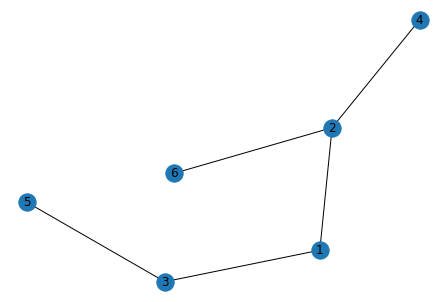

In [ ]:
nx.draw(gf, with_labels=True)
plt.show()

Okay, so now we can get our hands dirty. Let’s implement some algorithms on it, how about a Depth First Search ?
Here’s an Implementation of DFS, each time we visit a vertex we color them blue(initially red)

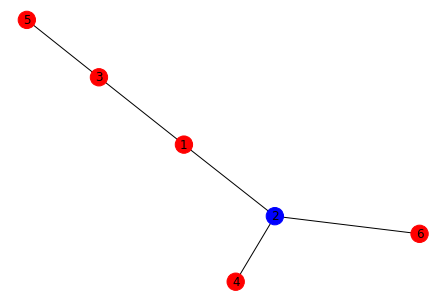

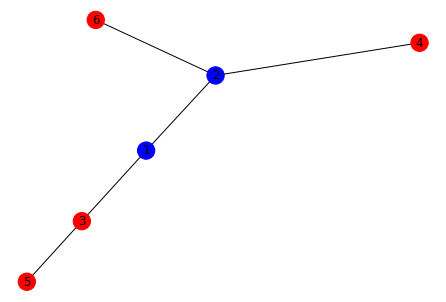

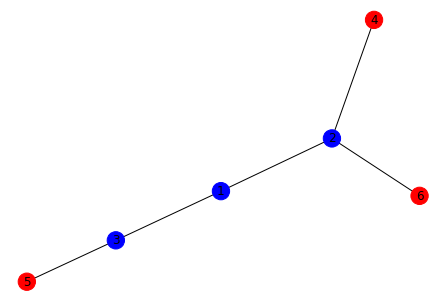

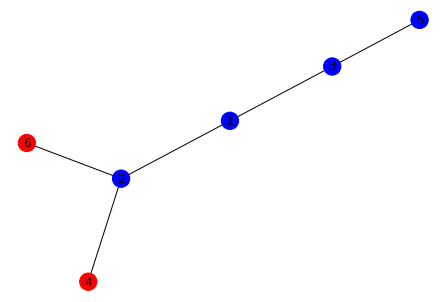

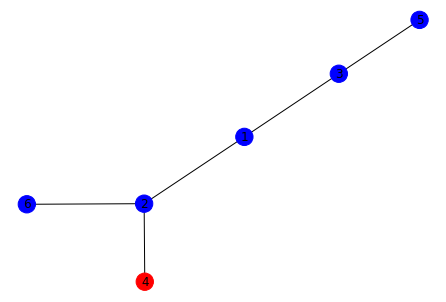

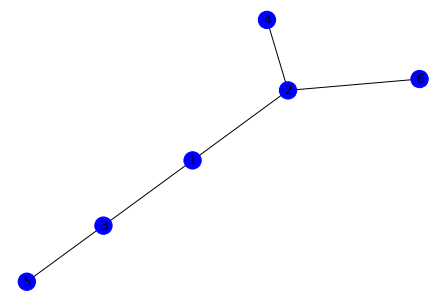

In [ ]:
visited=[]
color_map=['red']*(gf.number_of_nodes()+0) #Coloring them red.
def dfs(x):
    if(x not in visited): #If node is not yet visited,pay a visit.
        color_map[x-1]='blue' # Color them blue once visited.
        nx.draw(gf,node_color=color_map,with_labels=True)
        plt.show()
        visited.append(x)
        all_n=nx.neighbors(gf,x)
        for x_o in all_n:
            dfs(x_o)
dfs(2)